# 1. b) Multiple features

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
W = np.array([0, 0, 0])

W_true = np.array([5, 12, 0.07]) # Ground truth: y = 5 + 12*x1 + 0.07*x2

m = 1000
limit = 700

# instead of generating random numbers and normalising start with normalised data
X = np.array([np.ones(limit), np.random.randn(limit,), np.random.randn(limit,)])
X_test = np.array([np.ones(m-limit), np.random.randn(m-limit,), np.random.randn(m-limit,)])

Y = np.matmul(W_true,X)
Y_test = np.matmul(W_true,X_test)

In [8]:
learning_rate = 0.0025
error = []

for _ in range(2000):
    
    Y_ = np.matmul(W, X)
    
    mse = np.mean((Y-Y_)**2)
    error.append(mse)

    ct = 2*(Y - Y_) #common term in derivative
    
    dL_dw = np.array([np.mean(ct), np.mean(ct*X[1]), np.mean(ct*X[2])])
    
    W =  W + learning_rate*dL_dw

print("mean_squared_error : " + str(mse))
print("W : "+ str(W))

mean_squared_error : 9.76791511993e-15
W : [  4.99999996  11.99999992   0.06999995]


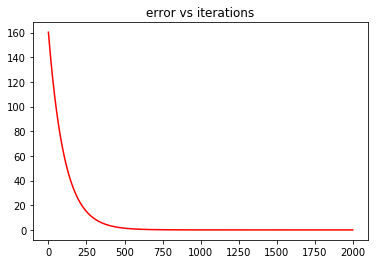

In [4]:
plt.plot(range(len(error)),error, color="red")
plt.title("error vs iterations")
plt.show()

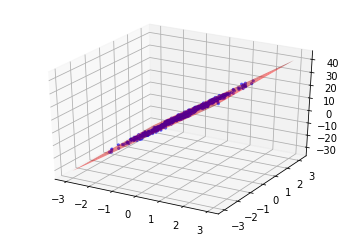

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

x = np.linspace(-3,3,10)
y = np.linspace(-3,3,10)
x,y = np.meshgrid(x,y)
z2 = W[0] + W[1]*x + W[2]*y

ax.scatter(X[1], X[2], Y,color= 'b', marker=".",alpha= 0.5)
ax.plot_surface(x, y, z2, color= 'r', alpha= 0.5)

plt.show()

In [7]:
test_error = np.mean((Y_test-np.matmul(W,X_test))**2)
print("test_error : "+str(test_error))

test_error : 1.1491677866e-06
